In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
from numpy.linalg import inv

## Problem1

In [3]:
# Read in data from csv
data = pd.read_csv("DailyReturn.csv")
# df drop the first column of time stamp
df = data.iloc[:,1:]

In [4]:
df

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
5,0.009649,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,0.006741,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
6,0.002029,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,-0.009354,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
7,0.001720,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,-0.002683,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
8,0.004043,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,0.005904,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
9,0.006105,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,0.002744,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


In [5]:
# Generate weights
# w: weight for time t
def weights_gen(lamda,t):
    # Initialize values
    tw = 0
    w = np.zeros(t)
    # calculate weights
    for i in range(t):
        w[i] = (1-lamda)*lamda ** (t-i-1)
        tw += w[i]
    for i in range(t):
        w[i] = w[i]/tw
    return w

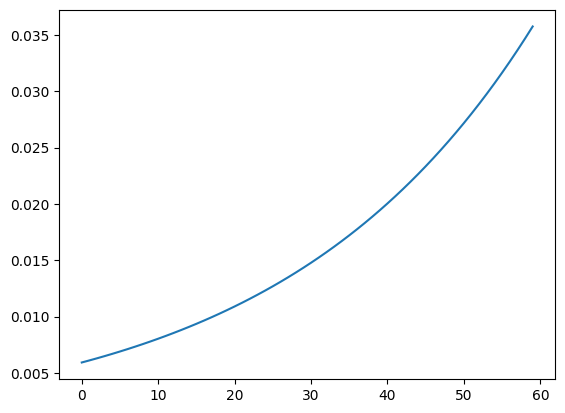

In [6]:
plt.plot(weights_gen(0.97,60))

In [9]:
# weighted covariance calculation
def w_cov(df,lamda):
    n = df.shape[1]
    t = df.shape[0]
    w = weights_gen(lamda,t)
    means = np.array(df.mean())
    xhat = df.copy()
    for i in range(n):
        xhat.iloc[:,i]=xhat.iloc[:,i]-means[i]
    cov = xhat.multiply(w,axis=0).T @ xhat
    return cov

In [10]:
def pca_vecs(cov):
    eigvalues, eigvector = np.linalg.eigh(cov)
    # Sort the eig values and vector
    vals = np.flip(eigvalues)
    vecs = np.flip(eigvector,axis=1)
    # Only use the positive eigen values
    posv_ind = np.where(vals >= 1e-8)[0]
    vals = vals[posv_ind]
    vecs = vecs[:,posv_ind]
    vals = np.real(vals)
    return vals,vecs

In [11]:
def pca_pct(vals):
    # Total eigen values
    tv = vals.sum()
    pct_dic = {}
    for k in range(len(vals)):
        pct = vals[:k+1].sum()/tv
        pct_dic[k]=pct
    pct_series = pd.Series(pct_dic)
    return pct_series

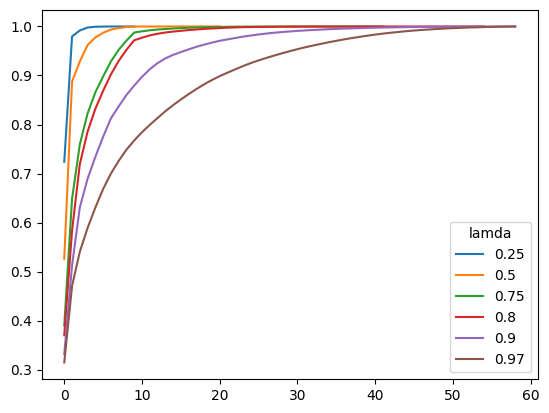

In [12]:
# Set the lamda value list
lamda = [0.25,0.5,0.75,0.8,0.9,0.97]
for l in lamda:
    cov_w = w_cov(df,l)
    vals = pca_vecs(cov_w)[0]
    pct = pca_pct(vals)
    plt.plot(pct,label ="{}".format(l))
plt.legend(title='lamda')

## Problem 2

In [13]:
# Cholesky that assumes PSD
def chol_psd(a):
    n= a.shape[0]
    root = np.zeros((n,n))
    for j in range(n):
        # s is the sum of square of values for row j subtracted from A_jj
        s=0
        if j>0:
            s = root[j,:j].T @ root[j,:j]
        # diagonal element
        temp = a[j,j] - s
        if temp <= 0 and temp >= -1e-8:
            temp =0
        root[j,j] = math.sqrt(temp)
        # Set column to 0 for 0 eigen values
        if root[j,j] == 0:
            root[j+1:n,j] = 0
        else:
            ir = 1/root[j,j]
            for i in range(j+1,n):
                s = root[i,:j].T @ root[j,:j]
                root[i,j] = (a[i,j]-s)*ir
    return root

In [14]:
def near_psd(a,epsilon=0):
    n= a.shape[0]
    invSD = None
    out = a.copy()
    #  Convert to correlation if we get a covariance
    if (np.diag(out)==1).sum() != n:
        invSD = np.diag(1/np.sqrt(np.diag(out)))
        out = invSD @ out @ invSD
    #  Update eigen value and scale
    vals, vecs = np.linalg.eigh(out)
    # adjust eigen values to non negative
    vals[vals<epsilon]=0
    T = 1/(vecs * vecs @ vals)
    T = np.diag(np.sqrt(T))
    l = np.diag(np.sqrt(vals))
    B = T @ vecs @ l
    out = B @ B.T
    # Add back to variance
    if invSD is not None:
        invSD = np.diag(1/np.diag(invSD))
        out = invSD @ out @ invSD
    return out

In [15]:
# The first projection
def pu(x):
    n = x.shape[0]
    x_pu = x.copy()
    for i in range(n):
        for j in range(n):
            if i==j:
                x_pu[i][j]=1
    return x_pu

# The second projection
def ps(x,w=None):
    n = x.shape[0]
    if w != None:
        # parameter pass in array of diags
        w_diag = np.diag(w)
    else:
        w_diag = np.diag(np.ones(n))
    x_w = np.sqrt(w_diag) @ x @ np.sqrt(w_diag)
    # Perform (A)+ on weighted A
    vals, vecs = np.linalg.eigh(x_w)
    vals[vals<1e-8]=0
    l = np.diag(vals)
    # The adjusted A
    x_pos = vecs @ l @ vecs.T
    w_inv = np.linalg.inv(np.sqrt(w_diag))
    out = w_inv @ x_pos @ w_inv
    return out

# Calculate Frobenius Norm
def fnorm(x):
    n = x.shape[0]
    result = 0
    for i in range(n):
        for j in range(n):
            result += x[i][j] ** 2
    return result

# k: max iteration
def higham(a,gamma0=np.inf,K=100,tol=1e-08):
    delta_s = [0]
    gamma = [gamma0]
    Y = [a]
    for k in range(1,K+1):
        R_k = Y[k-1] - delta_s[k-1]
        X_k = ps(R_k)
        delta_s_k = X_k - R_k
        delta_s.append(delta_s_k)
        Y_k = pu(X_k)
        Y.append(Y_k)
        gamma_k = fnorm(Y_k-a)
        gamma.append(gamma_k)
        if gamma_k -gamma[k-1] < tol:
            vals = np.linalg.eigh(Y_k)[0]
            if vals.min() >= 1e-8:
                break
            else:
                continue
    return Y[-1]

In [16]:
# Gnerate a non-psd correlation matrix
def npsd(n):
    sigma = np.empty((n,n))
    sigma.fill(0.9)
    for i in range(n):
        sigma[i,i]=1
    sigma[0,1]=0.7357
    sigma[1,0]=0.7357
    return sigma

In [17]:
# Compare results with N increasing
size=[5,50,100,500]
# Near PSD
for n in size:
    print("size: {}".format(n))
    sigma = npsd(n)
    fixed_near = near_psd(sigma)
    # Check if the fixed matrix is PSD
    vals_fixed = np.linalg.eigh(fixed_near)[0]
    assert(vals_fixed.min() >= -1e-8)
    near_diff = fnorm(fixed_near-sigma)
    print("Result diff:{}".format(near_diff))

# Compare runtime with N increasing
for n in size:
    print("Runtime of size {}".format(n))
    sigma = npsd(n)
    %timeit near_psd(sigma)

size: 5
Result diff:1.465220408721486e-10
size: 50
Result diff:0.034479029796038424
size: 100
Result diff:0.07441520643473999
size: 500
Result diff:0.39378468348855594
Runtime of size 5
14.2 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Runtime of size 50
343 µs ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Runtime of size 100
1.29 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Runtime of size 500
43.5 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
#Higham
for n in size:
    print("size: {}".format(n))
    sigma = npsd(n)
    fixed_h = higham(sigma)
    vals_fixed = np.linalg.eigh(fixed_near)[0]
    assert(vals_fixed.min() >= -1e-08)
    h_diff = fnorm(fixed_h-sigma)
    print("Result diff: {}".format(h_diff))

for n in size:
    print("Runtime of size {}".format(n))
    sigma = npsd(n)
    %timeit higham(sigma)

size: 5
Result diff: 1.022467459499861e-10
size: 50
Result diff: 0.006189339461809023
size: 100
Result diff: 0.007164374615640445
size: 500
Result diff: 0.008036763251122318
Runtime of size 5
3.66 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Runtime of size 50
162 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Runtime of size 100
633 ms ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Runtime of size 500
13.9 s ± 1.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Problem 3

In [31]:
# Pearson correlation and var
def pcov(df):
    vars =df.var()
    std = np.sqrt(vars)
    # Get the pearson correlation matrix
    corr = np.corrcoef(df,rowvar=False)
    cov = np.diag(std) @ corr @ np.diag(std)
    return cov

In [42]:
# EW(cov+corr)
def w_cov(df,lamda=0.97):
    n = df.shape[1]
    t = df.shape[0]
    w = weights_gen(lamda,t)
    means = np.array(df.mean())
    xhat = df.copy()
    for i in range(n):
        xhat.iloc[:,i]=xhat.iloc[:,i]-means[i]
    cov = xhat.multiply(w,axis=0).T @ xhat
    cov = cov.to_numpy(copy=True)
    return cov

In [33]:
# Pearson correlation and EW variance
def pcor_ewvar(df,lamda=0.97):
    # w_var is the diag of w_cov
    w_var = np.diag(w_cov(df,lamda))
    w_std = np.sqrt(w_var)
    corr = np.corrcoef(df,rowvar=False)
    cov = np.diag(w_std) @ corr @ np.diag(w_std)
    return cov

In [34]:
# EW Corr +Var
def wcor_var(df,lamda=0.97):
    wcov = w_cov(df,lamda)
    w_var = np.diag(w_cov(df,lamda))
    w_std = np.sqrt(w_var)
    w_corr = np.diag(1/w_std) @ wcov @ np.diag(1/w_std)
    vars =df.var()
    std = np.sqrt(vars)
    cov = np.diag(std) @ w_corr @ np.diag(std)
    return cov

In [35]:
# Calculate vals based on pct explained
def vals_pct(vals,vecs,pct):
    # Total eigen values
    tv = vals.sum()
    for k in range(len(vals)):
        explained = vals[:k+1].sum()/tv
        if explained >= pct:
            break
    return vals[:k+1],vecs[:,:k+1]

In [36]:
# Direct Simulation
def normal_sim(a,nsim,seed,means=None,fixmethod=near_psd):
    eigval_min = np.linalg.eigh(a)[0].min()
    if eigval_min < 1e-08:
        a = fixmethod(a)
    l = chol_psd(a)
    m = l.shape[0]
    np.random.seed(seed)
    z = np.random.normal(size=(m,nsim))
    X = (l @ z).T
    # If mean is not zero add back
    if means != None:
        if means.size != m:
            raise Exception("Mean size does not match with cov")
        X.add(means,axis=1)
    return X

In [37]:
def pca_vecs(cov):
    eigvalues, eigvector = np.linalg.eigh(cov)
    # Sort the eig values and vector
    vals = np.flip(eigvalues)
    vecs = np.flip(eigvector,axis=1)
    # Only use the positive eigen values
    posv_ind = np.where(vals >= 1e-8)[0]
    vals = vals[posv_ind]
    vecs = vecs[:,posv_ind]
    vals = np.real(vals)
    return vals,vecs

In [38]:
#PCA Simulation
def pca_simulate(a,nsim,seed,means=None,pct=None):
    # Use the pca function above
    vals,vecs = pca_vecs(a)
    # If pct is given
    if pct != None:
        vals,vecs = vals_pct(vals,vecs,pct)
    B = vecs @ np.diag(np.sqrt(vals))
    m = vals.size
    np.random.seed(seed)
    r = np.random.normal(size=(m,nsim))
    out = (B @ r).T
    if means != None:
        if means.size != m:
            raise Exception("Mean size does not match with cov")
        out.add(means,axis=1)
    return out

In [47]:
# Comparison for direct simulation
cov_opt = [pcov,pcor_ewvar,w_cov,wcor_var]
for cov_f in cov_opt:
    cov_in = cov_f(df)
    s = normal_sim(cov_in,25000,10,means=None,fixmethod=near_psd)
    cov_out = np.cov(s,rowvar=False)
    diff = fnorm(cov_out -cov_in)
    print("result difference for {} is {}".format(cov_f,diff))

for cov_f in cov_opt:
        cov_in = cov_f(df)
        print("Runtime for {}:".format(cov_f))
        %timeit normal_sim(cov_in,25000,10,means=None,fixmethod=near_psd)

result difference for <function pcov at 0x1216639a0> is 4.727299178242648e-08
result difference for <function pcor_ewvar at 0x1216636d0> is 4.4793277603047775e-08
result difference for <function w_cov at 0x12674cdc0> is 4.3973121633615626e-08
result difference for <function wcor_var at 0x122198040> is 4.676029499362062e-08
Runtime for <function pcov at 0x1216639a0>:
87.2 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Runtime for <function pcor_ewvar at 0x1216636d0>:
83.1 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Runtime for <function w_cov at 0x12674cdc0>:
80.3 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Runtime for <function wcor_var at 0x122198040>:
82 ms ± 7.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
# Comparison for PCA
pct = [None,0.75,0.5]
cov_opt = [pcov,pcor_ewvar,w_cov,wcor_var]
# Simulation for each pair of pct and cov
for p in pct:
    for cov_f in cov_opt:
        # The input cov
        cov_in = cov_f(df)
        # Simulate the cov
        s = pca_simulate(cov_in,25000,10,pct=p)
        cov_out = np.cov(s,rowvar=False)
        # Compare the result
        diff = fnorm(cov_out -cov_in)
        print("result difference for {} at pct {} :{}".format(cov_f,p,diff))

for p in pct:
    for cov_f in cov_opt:
        # The input cov
        cov_in = cov_f(df)
        # Simulate the cov
        print("Runtime for {} with {} pca".format(cov_f,p))
        %timeit pca_simulate(cov_in,25000,10,pct=p)

result difference for <function pcov at 0x1216639a0> at pct None :5.120892778287315e-08
result difference for <function pcor_ewvar at 0x1216636d0> at pct None :4.937139130714809e-08
result difference for <function w_cov at 0x12674cdc0> at pct None :4.9413165138004514e-08
result difference for <function wcor_var at 0x122198040> at pct None :5.1172541918497475e-08
result difference for <function pcov at 0x1216639a0> at pct 0.75 :2.6830757396852755e-06
result difference for <function pcor_ewvar at 0x1216636d0> at pct 0.75 :2.474175897342974e-06
result difference for <function w_cov at 0x12674cdc0> at pct 0.75 :2.4575602421732813e-06
result difference for <function wcor_var at 0x122198040> at pct 0.75 :2.784549032292576e-06
result difference for <function pcov at 0x1216639a0> at pct 0.5 :1.115076886430098e-05
result difference for <function pcor_ewvar at 0x1216636d0> at pct 0.5 :1.037524006332122e-05
result difference for <function w_cov at 0x12674cdc0> at pct 0.5 :1.1915114420694589e-05
r